Do sensory effects change across wall separation conditions?

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import parse_data.prepare_data as prepare_data
import parse_data.identify_filepaths as identify_filepaths
import prepare_questionnaire_data
import globals

In [36]:
df = pd.read_csv('individual_analyses_and_questionnaire_data_table.csv')

In [37]:
df['pseudonym'] = df['Unnamed: 0']

In [38]:
df = df.drop(columns='Unnamed: 0')

In [39]:
df

,experiment_date,pH_H_first_vis_combined_solo_sep1,pH_H_first_vis_combined_solo_sep2,pH_H_first_vis_combined_solo_sep4,pH_H_first_vis_combined_solo_all_seps,pH_H_first_vis_first_solo_all_seps,pH_H_first_vis_second_solo_all_seps,pH_H_first_vis_social_sep1,pH_H_first_vis_social_sep2,pH_H_first_vis_social_sep4,pH_H_first_vis_social_all_seps,pH_L_first_vis_combined_solo_sep1,pH_L_first_vis_combined_solo_sep2,pH_L_first_vis_combined_solo_sep4,pH_L_first_vis_combined_solo_all_seps,pH_L_first_vis_first_solo_all_seps,pH_L_first_vis_second_solo_all_seps,pH_L_first_vis_social_sep1,pH_L_first_vis_social_sep2,pH_L_first_vis_social_sep4,pH_L_first_vis_social_all_seps,sensory_effect_solo_sep1,sensory_effect_social_sep1,solo-social_sensory_effect_sep1,sensory_effect_solo_sep2,sensory_effect_social_sep2,solo-social_sensory_effect_sep2,sensory_effect_solo_sep4,sensory_effect_social_sep4,solo-social_sensory_effect_sep4,sensory_effect_solo_all_seps,sensory_effect_social_all_seps,solo-social_sensory_effect_all_seps,pH_opp_visible_sep_1,pH_opp_visible_sep_2,pH_opp_visible_sep_4,pH_opp_visible_all_seps,pH_opp_not_visible_sep_1,pH_opp_not_visible_sep_2,pH_opp_not_visible_sep_4,pH_opp_not_visible_all_seps,p_win_other_visible_sep_1,p_win_other_visible_sep_2,p_win_other_visible_sep_4,p_win_other_visible,p_win_other_not_visible_sep_1,p_win_other_not_visible_sep_2,p_win_other_not_visible_sep_4,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,rt_by_traj_efficiency_first_solo,rt_by_traj_efficiency_second_solo,rt_by_traj_efficiency_combined_solo,rt_combined_solos,traj_efficiency_combined_solos,rt_by_traj_efficiency_wins,rt_by_traj_efficiency_losses,rt_wins,rt_losses,traj_efficiency_wins,traj_efficiency_losses,proportion_score,proportion_wins,scores_per_unit_time_socials,scores_per_unit_time_solos,AQ_total,GAD_total,BIS_total,opponent,pseudonym
0,2024-10-17,NaN,NaN,NaN,0.923076923,NaN,1.000000000,0.700000000,0.700000000,0.857142857,0.740740741,NaN,1.000000000,0.285714286,0.714285714,0.714285714,0.714285714,0.444444444,NaN,0.111111111,0.291666667,NaN,0.255555556,NaN,NaN,NaN,NaN,NaN,0.746031746,NaN,0.208791209,0.449074074,-0.240282865,0.833333333,0.444444444,0.375000000,0.586206897,0.685714286,0.545454545,0.444444444,0.586666667,0.428571429,0.181818182,0.083333333,0.243243243,0.518518519,0.437500000,0.538461538,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309,0.707516060,0.785909117,0.792748367,0.934699194,0.650797540,0.791414960,0.742233606,0.774258661,0.733502952,0.808571259,0.750964260,0.420091324,0.396396396,5.407391081,3.647107819,1.0,1.0,21.0,AW17,SP17
1,2024-11-20,0.909090909,1.000000000,1.000000000,0.961538462,0.900000000,1.000000000,0.928571429,0.866666667,0.812500000,0.866666667,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,0.937500000,0.375000000,0.235294118,0.536585366,-0.090909091,-0.008928571,-0.081980519,NaN,0.491666667,NaN,NaN,0.577205882,NaN,-0.038461538,0.330081301,-0.368542839,1.000000000,0.750000000,0.555555556,0.825000000,0.941176471,0.696969697,0.515151515,0.752136752,0.789473684,0.666666667,0.444444444,0.675000000,0.606060606,0.714285714,0.640000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781,0.884698878,0.872315188,0.929941170,0.919642857,0.940239483,0.920729585,0.838854318,0.860664305,0.688576212,0.980794865,0.989132423,0.703958692,0.669014085,9.932994786,6.675133394,3.0,4.0,19.0,ZS20,VC20
2,2025-02-04,0.909090909,NaN,1.000000000,0.947368421,0.909090909,1.000000000,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,NaN,NaN,0.769230769,-0.090909091,0.000000000,-0.090909091,NaN,NaN,NaN,0.000000000,NaN,NaN,-0.052631579,0.230769231,-0.283400810,1.000000000,NaN,NaN,0.923076923,1.000000000,0.875000000,0.714285714,0.923076923,0.733333333,0.800000000,0.500000000,0.692307692,0.900000000,1.000000000,0.5000000

In [40]:
import pingouin as pg

# from wide format into long format
df_long = df.melt(id_vars='pseudonym', value_vars=['solo-social_sensory_effect_sep1', 'solo-social_sensory_effect_sep2', 'solo-social_sensory_effect_sep4'],
                       var_name='wall_sep', value_name='ph_diff')

# drop nan values
df_long = df_long.dropna(subset=['ph_diff'])

#extract integer values for different wall seps
df_long['wall_sep'] = df_long['wall_sep'].str.extract('(\d)').astype(int)

aov = pg.rm_anova(data=df_long, dv='ph_diff', within='wall_sep', subject='pseudonym', detailed=True)
print(aov)


     Source           SS  DF           MS            F        p-unc          ng2          eps
0  wall_sep  0.310027303   2  0.155013652  2.753748293  0.075202112  0.034332494  0.819928323
1     Error  2.364258702  42  0.056291874          NaN          NaN          NaN          NaN


In [41]:
posthocs = pg.pairwise_tests(data=df_long, dv='ph_diff', within='wall_sep', subject='pseudonym', padjust='bonf')
print(posthocs)

   Contrast  A  B  Paired  Parametric            T   dof alternative        p-unc       p-corr p-adjust   BF10       hedges
0  wall_sep  1  2    True        True  2.067661322  21.0   two-sided  0.051214311  0.153642933     bonf  1.318  0.456464267
1  wall_sep  1  4    True        True  1.659544702  21.0   two-sided  0.111867208  0.335601624     bonf  0.726  0.386573269
2  wall_sep  2  4    True        True -0.192038934  21.0   two-sided  0.849556552  1.000000000     bonf  0.227 -0.023901100


Between sep 1 and 2 - only trend result

In [42]:
# from wide format into long format
df_long = df.melt(id_vars='pseudonym', value_vars=['solo-social_sensory_effect_sep1', 'solo-social_sensory_effect_sep2'],
                       var_name='wall_sep', value_name='ph_diff')

# drop nan values
df_long = df_long.dropna(subset=['ph_diff'])

#extract integer values for different wall seps
df_long['wall_sep'] = df_long['wall_sep'].str.extract('(\d)').astype(int)

aov = pg.rm_anova(data=df_long, dv='ph_diff', within='wall_sep', subject='pseudonym', detailed=True)
print(aov)

     Source           SS  DF           MS            F        p-unc          ng2  eps
0  wall_sep  0.302922015   1  0.302922015  5.816267448  0.023889749  0.056205835  1.0
1     Error  1.249964593  24  0.052081858          NaN          NaN          NaN  NaN


In [43]:
posthocs = pg.pairwise_tests(data=df_long, dv='ph_diff', within='wall_sep', subject='pseudonym', padjust='bonf')
print(posthocs)

   Contrast  A  B  Paired  Parametric            T   dof alternative        p-unc  BF10       hedges
0  wall_sep  1  2    True        True  2.411693896  24.0   two-sided  0.023889749  2.32  0.470697783


There is a significant difference in ph_diff between wall separation 1 and wall separation 2.

The effect size is moderate (0.47).

Bayes Factor suggests some evidence supporting this difference.

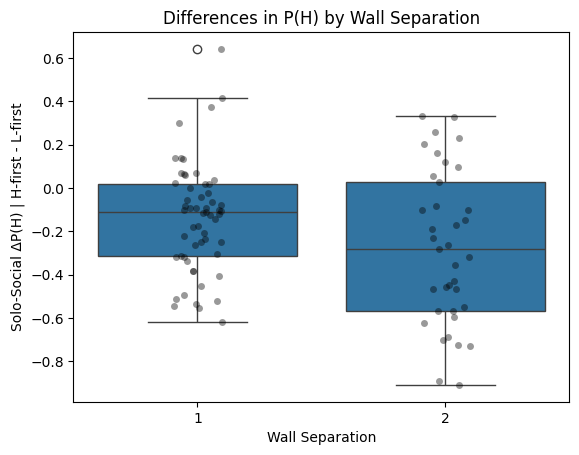

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_long, x='wall_sep', y='ph_diff')
sns.stripplot(data=df_long, x='wall_sep', y='ph_diff', color='black', alpha=0.4)
plt.xlabel("Wall Separation")
plt.ylabel("Solo-Social ΔP(H) | H-first - L-first")
plt.title("Differences in P(H) by Wall Separation")
plt.show()


This makes sense - we would expect preference for high to remain relatively stable in 45° trials, whereas for 90° trials it's negative, indicating a stronger first-seen effect 